In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


640


## Perform API Calls

In [3]:
#create df
weather_df = pd.DataFrame({"City":cities,
                           "Temperature":"",
                           "Humidity":"",
                           "Cloudiness":"",
                           "Wind Speed":""
})



# OpenWeatherMap API Key
api_key = api_keys.api_key

weather_df.head()
api_key

'a58509ec13b69fb2ddc509a7404ef42d'

In [4]:
# use iterrows to iterate through pandas dataframe
for index, row in weather_df.iterrows():

    # get restaurant type from df
    cityname = row['City']

    # create url
    url = f"http://api.openweathermap.org/data/2.5/weather?q={cityname}&units=imperial&APPID=" + api_key

    # assemble url and make API request
    print(f"Retrieving Results for Index {index}: {cityname}.")
    response = requests.get(url).json()
    #Grabbing data

    
    #Output results
    try:
        temp = response['main']['temp_max']
        humid = response['main']['humidity']
        cloud = response['clouds']['all']
        wind = response['wind']['speed']
        lat = response['coord']['lat']
        lng = response['coord']['lon']
    
        print(f"In {cityname}, the temp is {temp}F, the humidity is {humid},the cloudiness is {cloud}, and the wind speed is {wind}.")
        
        weather_df.loc[index, 'Latitude'] = lat
        weather_df.loc[index, 'Longitude'] = lng
        weather_df.loc[index, 'Max Temperature'] = temp
        weather_df.loc[index, 'Humidity'] = humid
        weather_df.loc[index, 'Cloudiness'] = cloud
        weather_df.loc[index, 'Wind Speed'] = wind
        
        
    except (KeyError, IndexError):
        print(f"Missing field/result... skipping. URL:{url}")
        
    print("------------")
    time.sleep(2.5)

Retrieving Results for Index 0: punta arenas.
In punta arenas, the temp is 48.2F, the humidity is 45,the cloudiness is 40, and the wind speed is 24.16.
------------
Retrieving Results for Index 1: bluff.
In bluff, the temp is 58.96F, the humidity is 87,the cloudiness is 0, and the wind speed is 7.52.
------------
Retrieving Results for Index 2: lebork.
In lebork, the temp is 42.8F, the humidity is 87,the cloudiness is 20, and the wind speed is 10.29.
------------
Retrieving Results for Index 3: yellowknife.
In yellowknife, the temp is 24.8F, the humidity is 53,the cloudiness is 90, and the wind speed is 6.93.
------------
Retrieving Results for Index 4: barentsburg.
Missing field/result... skipping. URL:http://api.openweathermap.org/data/2.5/weather?q=barentsburg&units=imperial&APPID=a58509ec13b69fb2ddc509a7404ef42d
------------
Retrieving Results for Index 5: flin flon.
In flin flon, the temp is 33.8F, the humidity is 40,the cloudiness is 75, and the wind speed is 13.87.
------------


Retrieving Results for Index 51: huetamo.
Missing field/result... skipping. URL:http://api.openweathermap.org/data/2.5/weather?q=huetamo&units=imperial&APPID=a58509ec13b69fb2ddc509a7404ef42d
------------
Retrieving Results for Index 52: leningradskiy.
In leningradskiy, the temp is 39.79F, the humidity is 89,the cloudiness is 24, and the wind speed is 11.43.
------------
Retrieving Results for Index 53: sao jose da coroa grande.
In sao jose da coroa grande, the temp is 77.41F, the humidity is 82,the cloudiness is 88, and the wind speed is 9.98.
------------
Retrieving Results for Index 54: tuktoyaktuk.
In tuktoyaktuk, the temp is 24.8F, the humidity is 79,the cloudiness is 75, and the wind speed is 13.87.
------------
Retrieving Results for Index 55: new norfolk.
In new norfolk, the temp is 41F, the humidity is 80,the cloudiness is 20, and the wind speed is 10.29.
------------
Retrieving Results for Index 56: bathsheba.
In bathsheba, the temp is 84.2F, the humidity is 74,the cloudiness 

Retrieving Results for Index 102: trat.
In trat, the temp is 79.03F, the humidity is 100,the cloudiness is 0, and the wind speed is 5.84.
------------
Retrieving Results for Index 103: hamilton.
In hamilton, the temp is 78.8F, the humidity is 74,the cloudiness is 40, and the wind speed is 18.34.
------------
Retrieving Results for Index 104: peniche.
In peniche, the temp is 73.4F, the humidity is 17,the cloudiness is 0, and the wind speed is 4.7.
------------
Retrieving Results for Index 105: san patricio.
In san patricio, the temp is 70.03F, the humidity is 84,the cloudiness is 8, and the wind speed is 5.28.
------------
Retrieving Results for Index 106: port alfred.
In port alfred, the temp is 61.93F, the humidity is 89,the cloudiness is 92, and the wind speed is 5.61.
------------
Retrieving Results for Index 107: viligili.
Missing field/result... skipping. URL:http://api.openweathermap.org/data/2.5/weather?q=viligili&units=imperial&APPID=a58509ec13b69fb2ddc509a7404ef42d
-----------

Retrieving Results for Index 153: guayaramerin.
In guayaramerin, the temp is 85.24F, the humidity is 71,the cloudiness is 44, and the wind speed is 2.48.
------------
Retrieving Results for Index 154: lebu.
In lebu, the temp is 49.51F, the humidity is 76,the cloudiness is 0, and the wind speed is 6.06.
------------
Retrieving Results for Index 155: arlit.
In arlit, the temp is 83.44F, the humidity is 29,the cloudiness is 12, and the wind speed is 4.38.
------------
Retrieving Results for Index 156: mastic beach.
In mastic beach, the temp is 73.94F, the humidity is 61,the cloudiness is 20, and the wind speed is 8.05.
------------
Retrieving Results for Index 157: teeli.
In teeli, the temp is 17.29F, the humidity is 65,the cloudiness is 44, and the wind speed is 2.71.
------------
Retrieving Results for Index 158: nouadhibou.
In nouadhibou, the temp is 80.6F, the humidity is 54,the cloudiness is 64, and the wind speed is 16.11.
------------
Retrieving Results for Index 159: bambous virie

Retrieving Results for Index 204: evensk.
In evensk, the temp is 41.77F, the humidity is 100,the cloudiness is 24, and the wind speed is 15.01.
------------
Retrieving Results for Index 205: half moon bay.
In half moon bay, the temp is 80.6F, the humidity is 61,the cloudiness is 90, and the wind speed is 16.11.
------------
Retrieving Results for Index 206: buraydah.
In buraydah, the temp is 75.2F, the humidity is 29,the cloudiness is 0, and the wind speed is 2.24.
------------
Retrieving Results for Index 207: puerto leguizamo.
In puerto leguizamo, the temp is 91.45F, the humidity is 48,the cloudiness is 24, and the wind speed is 1.48.
------------
Retrieving Results for Index 208: basirpur.
In basirpur, the temp is 67.33F, the humidity is 83,the cloudiness is 20, and the wind speed is 5.06.
------------
Retrieving Results for Index 209: saint-francois.
In saint-francois, the temp is 57.2F, the humidity is 76,the cloudiness is 0, and the wind speed is 3.36.
------------
Retrieving Res

Retrieving Results for Index 255: nauta.
In nauta, the temp is 92.62F, the humidity is 47,the cloudiness is 32, and the wind speed is 3.15.
------------
Retrieving Results for Index 256: port elizabeth.
In port elizabeth, the temp is 80.06F, the humidity is 54,the cloudiness is 1, and the wind speed is 8.05.
------------
Retrieving Results for Index 257: kamenskoye.
Missing field/result... skipping. URL:http://api.openweathermap.org/data/2.5/weather?q=kamenskoye&units=imperial&APPID=a58509ec13b69fb2ddc509a7404ef42d
------------
Retrieving Results for Index 258: stokmarknes.
In stokmarknes, the temp is 39.2F, the humidity is 64,the cloudiness is 75, and the wind speed is 3.36.
------------
Retrieving Results for Index 259: thompson.
In thompson, the temp is 37.4F, the humidity is 37,the cloudiness is 75, and the wind speed is 10.29.
------------
Retrieving Results for Index 260: kawalu.
In kawalu, the temp is 63.19F, the humidity is 99,the cloudiness is 88, and the wind speed is 1.14.
-

In coruripe, the temp is 78.49F, the humidity is 96,the cloudiness is 0, and the wind speed is 13.22.
------------
Retrieving Results for Index 305: khasan.
In khasan, the temp is 52.21F, the humidity is 100,the cloudiness is 0, and the wind speed is 2.71.
------------
Retrieving Results for Index 306: mubi.
In mubi, the temp is 73F, the humidity is 71,the cloudiness is 0, and the wind speed is 2.48.
------------
Retrieving Results for Index 307: kendari.
In kendari, the temp is 71.92F, the humidity is 92,the cloudiness is 36, and the wind speed is 2.04.
------------
Retrieving Results for Index 308: kuching.
In kuching, the temp is 75.2F, the humidity is 100,the cloudiness is 75, and the wind speed is 2.24.
------------
Retrieving Results for Index 309: otjimbingwe.
In otjimbingwe, the temp is 68.41F, the humidity is 50,the cloudiness is 0, and the wind speed is 3.94.
------------
Retrieving Results for Index 310: rungata.
Missing field/result... skipping. URL:http://api.openweatherma

Retrieving Results for Index 354: sambava.
In sambava, the temp is 73.81F, the humidity is 100,the cloudiness is 76, and the wind speed is 12.77.
------------
Retrieving Results for Index 355: washougal.
In washougal, the temp is 66.02F, the humidity is 38,the cloudiness is 1, and the wind speed is 14.99.
------------
Retrieving Results for Index 356: hovd.
In hovd, the temp is 42.8F, the humidity is 86,the cloudiness is 75, and the wind speed is 11.41.
------------
Retrieving Results for Index 357: bargal.
Missing field/result... skipping. URL:http://api.openweathermap.org/data/2.5/weather?q=bargal&units=imperial&APPID=a58509ec13b69fb2ddc509a7404ef42d
------------
Retrieving Results for Index 358: byron bay.
In byron bay, the temp is 68F, the humidity is 68,the cloudiness is 0, and the wind speed is 10.29.
------------
Retrieving Results for Index 359: sistranda.
In sistranda, the temp is 42.8F, the humidity is 87,the cloudiness is 40, and the wind speed is 14.99.
------------
Retriev

Retrieving Results for Index 404: tilichiki.
In tilichiki, the temp is 42.49F, the humidity is 93,the cloudiness is 88, and the wind speed is 12.55.
------------
Retrieving Results for Index 405: saleaula.
Missing field/result... skipping. URL:http://api.openweathermap.org/data/2.5/weather?q=saleaula&units=imperial&APPID=a58509ec13b69fb2ddc509a7404ef42d
------------
Retrieving Results for Index 406: suez.
In suez, the temp is 74.26F, the humidity is 67,the cloudiness is 24, and the wind speed is 4.94.
------------
Retrieving Results for Index 407: lasa.
In lasa, the temp is 71.6F, the humidity is 82,the cloudiness is 0, and the wind speed is 8.05.
------------
Retrieving Results for Index 408: mirnyy.
In mirnyy, the temp is 44.65F, the humidity is 99,the cloudiness is 68, and the wind speed is 10.54.
------------
Retrieving Results for Index 409: nojorid.
In nojorid, the temp is 46.4F, the humidity is 100,the cloudiness is 0, and the wind speed is 4.7.
------------
Retrieving Results f

Retrieving Results for Index 456: boljarovo.
Missing field/result... skipping. URL:http://api.openweathermap.org/data/2.5/weather?q=boljarovo&units=imperial&APPID=a58509ec13b69fb2ddc509a7404ef42d
------------
Retrieving Results for Index 457: velsk.
In velsk, the temp is 45.46F, the humidity is 97,the cloudiness is 44, and the wind speed is 7.96.
------------
Retrieving Results for Index 458: saint-georges.
In saint-georges, the temp is 55.72F, the humidity is 80,the cloudiness is 0, and the wind speed is 3.04.
------------
Retrieving Results for Index 459: beidao.
In beidao, the temp is 38.89F, the humidity is 68,the cloudiness is 0, and the wind speed is 4.16.
------------
Retrieving Results for Index 460: adrar.
In adrar, the temp is 78.8F, the humidity is 22,the cloudiness is 0, and the wind speed is 13.87.
------------
Retrieving Results for Index 461: richards bay.
In richards bay, the temp is 58.96F, the humidity is 100,the cloudiness is 100, and the wind speed is 14.79.
-------

Retrieving Results for Index 507: rawannawi.
Missing field/result... skipping. URL:http://api.openweathermap.org/data/2.5/weather?q=rawannawi&units=imperial&APPID=a58509ec13b69fb2ddc509a7404ef42d
------------
Retrieving Results for Index 508: seoul.
In seoul, the temp is 55.4F, the humidity is 87,the cloudiness is 12, and the wind speed is 3.36.
------------
Retrieving Results for Index 509: fairbanks.
In fairbanks, the temp is 49.64F, the humidity is 10,the cloudiness is 1, and the wind speed is 5.82.
------------
Retrieving Results for Index 510: tselinnoye.
In tselinnoye, the temp is 58.24F, the humidity is 98,the cloudiness is 32, and the wind speed is 10.98.
------------
Retrieving Results for Index 511: abu samrah.
In abu samrah, the temp is 63.64F, the humidity is 56,the cloudiness is 12, and the wind speed is 3.15.
------------
Retrieving Results for Index 512: saint anthony.
In saint anthony, the temp is 69.08F, the humidity is 31,the cloudiness is 1, and the wind speed is 24.

Retrieving Results for Index 556: gazojak.
In gazojak, the temp is 62.47F, the humidity is 41,the cloudiness is 0, and the wind speed is 9.75.
------------
Retrieving Results for Index 557: lufilufi.
In lufilufi, the temp is 82.81F, the humidity is 99,the cloudiness is 56, and the wind speed is 23.73.
------------
Retrieving Results for Index 558: katsuura.
In katsuura, the temp is 64.4F, the humidity is 82,the cloudiness is 75, and the wind speed is 4.7.
------------
Retrieving Results for Index 559: puerto penasco.
In puerto penasco, the temp is 82.27F, the humidity is 100,the cloudiness is 0, and the wind speed is 14.23.
------------
Retrieving Results for Index 560: pahrump.
In pahrump, the temp is 84.92F, the humidity is 30,the cloudiness is 20, and the wind speed is 12.75.
------------
Retrieving Results for Index 561: tiznit.
In tiznit, the temp is 68.86F, the humidity is 95,the cloudiness is 20, and the wind speed is 3.49.
------------
Retrieving Results for Index 562: homer.
I

Retrieving Results for Index 607: silute.
In silute, the temp is 48.61F, the humidity is 84,the cloudiness is 92, and the wind speed is 20.38.
------------
Retrieving Results for Index 608: valentin gomez farias.
In valentin gomez farias, the temp is 77F, the humidity is 31,the cloudiness is 40, and the wind speed is 3.36.
------------
Retrieving Results for Index 609: chegdomyn.
In chegdomyn, the temp is 27.01F, the humidity is 74,the cloudiness is 0, and the wind speed is 2.48.
------------
Retrieving Results for Index 610: saint marys.
In saint marys, the temp is 71.06F, the humidity is 65,the cloudiness is 1, and the wind speed is 5.82.
------------
Retrieving Results for Index 611: grand gaube.
In grand gaube, the temp is 62.6F, the humidity is 82,the cloudiness is 20, and the wind speed is 9.17.
------------
Retrieving Results for Index 612: zhigansk.
In zhigansk, the temp is 33.76F, the humidity is 100,the cloudiness is 88, and the wind speed is 1.59.
------------
Retrieving Res

In [6]:
#Writing to CSV
weather_df = weather_df.dropna(how = 'any')
weather_df.to_csv("weatherpy.csv", index = False)

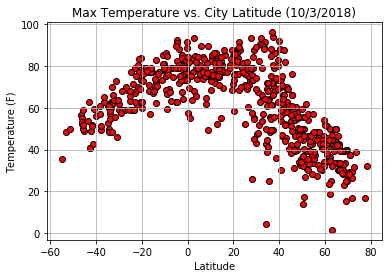

In [12]:
# Producing Plots

#* Temperature (F) vs. Latitude
plt.scatter(weather_df['Latitude'], weather_df["Max Temperature"], marker='o', facecolors = 'red', edgecolors = 'black')
plt.title('Max Temperature vs. City Latitude (10/3/2018)')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()
plt.savefig('Maxtemp_lat')

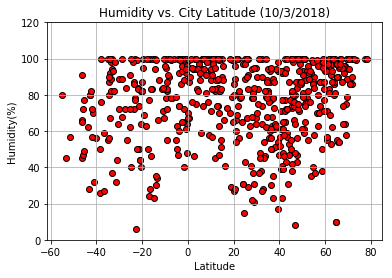

In [14]:
# Humidity (%) vs. Latitude
plt.scatter(weather_df['Latitude'], weather_df["Humidity"], marker='o', facecolors = 'red', edgecolors = 'black')
plt.title('Humidity vs. City Latitude (10/3/2018)')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.ylim(0,120)
plt.grid()
plt.savefig('humidity_lat')



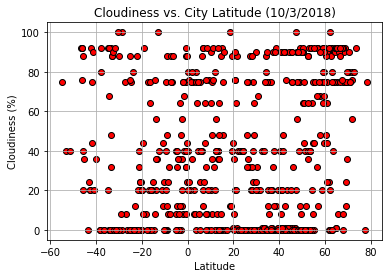

In [15]:
#Cloudiness (%) vs. Latitude
plt.scatter(weather_df['Latitude'], weather_df["Cloudiness"], marker='o', facecolors = 'red', edgecolors = 'black')
plt.title('Cloudiness vs. City Latitude (10/3/2018)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('cloud_lat')

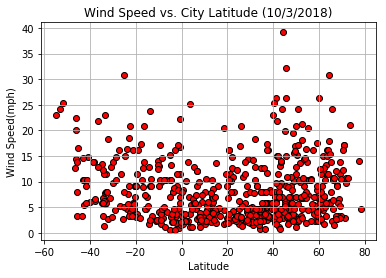

In [16]:
#Wind Speed (mph) vs. Latitude
plt.scatter(weather_df['Latitude'], weather_df["Wind Speed"], marker='o', facecolors = 'red', edgecolors = 'black')
plt.title('Wind Speed vs. City Latitude (10/3/2018)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.grid()
plt.savefig('humidity_lat')

In [ ]:
#Three Observations
#1 Temperatures are highest in cities near the equator and decrease the farther away a city is from the equator
#2 The closer you get to the equator, there is less variation in humidity and humidity is higher
#3 Wind Speeds are higher for cities farther away from the equator